# Image data 정리 

## Content
1. CIFAR-10
2. MNIST
3. ..
4. convolution
5. padding
6. pooling


In [ ]:
!mkdir drive/MyDrive/Image

mkdir: cannot create directory ‘drive/MyDrive/Image’: File exists


In [ ]:
data_path = "/content/drive/MyDrive/Image"

In [ ]:
!ls $data_path

cifar-10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch import nn
import torchvision
from torchvision import models, transforms
from torchvision import datasets

## 1. CIFAR-10 

### 1.1 Download CIFAR-10 Dataset

In [ ]:
!mkdir $data_path/cifar-10

mkdir: cannot create directory ‘/content/drive/MyDrive/Image/cifar-10’: File exists


In [ ]:
cifar_path = data_path + "/cifar-10/"
# Train_cifat-10 data
cifar10 = datasets.CIFAR10(cifar_path, train = True, download=True) 
# Validation_cifar-10 data
cifar10_val = datasets.CIFAR10(cifar_path, train = False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
print(len(cifar10))
print(len(cifar10_val))

50000
10000


In [ ]:
img, label = cifar10[7]
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6D859A29D0>, 7)

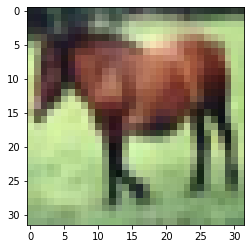

In [ ]:
plt.imshow(img)
plt.show()

## 1.2 To Tensor

In [ ]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape # 3-channel(RGB) 32x32 image

torch.Size([3, 32, 32])

In [ ]:
# tensor로 바꿔 dwonload하기 
tensor_cifar10 = datasets.CIFAR10(cifar_path, train=True, download=False, transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[7]
type(img_t)

torch.Tensor

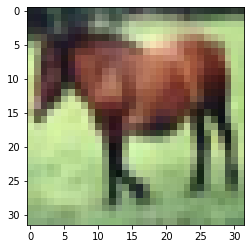

In [ ]:
plt.imshow(img_t.permute(1, 2, 0)) # CxHxW(tensor) -> HxWxC(image) , tensor와 이미지의 차원 배열 순서가 다름 
plt.show()

## 1.3 Normaliization

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3,1024,50000).shape 

torch.Size([3, 1024, 50000])

In [ ]:
imgs.view(3,-1).shape # 3 x ? 를 만들어줌 , ?는 pytorch가 만들어줌 

torch.Size([3, 51200000])

In [ ]:
imgs.view(3,-1).mean(dim=1) # (3,51200000) -> mean -> (3,) 

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [ ]:
# totensor,Normalizae 한번에 하기 
transformed_cifar10 = datasets.CIFAR10(
    cifar_path,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616)
        )
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


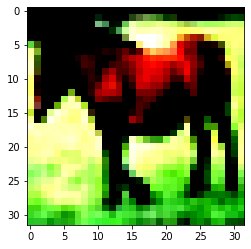

In [ ]:
img_t,_ = transformed_cifar10[7]
plt.imshow(img_t.permute(1,2,0))
plt.show()

---
---
## 2. MNIST 

### 2.1 Download MNIST Dataset

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
mnist_path = data_path + "/MNIST/"

trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.1,),(0.5,))])
# MNIST dataset
train_dataset = MNIST(mnist_path, transform=trans, train=True, download=True)
test_dataset = MNIST(mnist_path, transform=trans, train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Image/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Image/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Image/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Image/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Image/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Image/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Image/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Image/MNIST/MNIST/raw



In [ ]:
print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())

print(test_dataset.test_data.size())
print(test_dataset.test_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


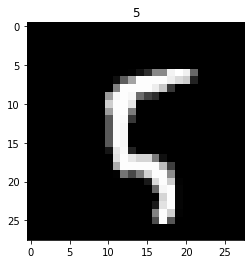

In [ ]:
plt.imshow(train_dataset.data[100], cmap='gray')
plt.title('%i' % train_dataset.targets[100])
plt.show()